In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
meanX1 = df['MLOGP'].mean()
meanX2 = df['RDCHI'].mean()
meanY = df['quantitative response of LC50'].mean()
stdX1 = df['MLOGP'].std()
stdX2 = df['RDCHI'].std()
stdY = df['quantitative response of LC50'].std()
print(meanX1, meanX2, meanY, stdX1, stdX2, stdY)

2.3134926739926738 2.4922985347985356 4.6584212454212475 1.741797285664983 0.8110039291512505 1.6652150617992907


In [4]:
df['MLOGP'] = (df['MLOGP'] - meanX1)/stdX1
df['RDCHI'] = (df['RDCHI'] - meanX2)/stdX2
df['quantitative response of LC50'] = (df['quantitative response of LC50'] - meanY)/stdY
df

,MLOGP,RDCHI,quantitative response of LC50
0,0.060574,-1.562629,-0.551533
1,0.186306,-1.345614,-0.197225
2,2.001098,0.539703,1.417582
3,1.802453,0.486683,1.239827
4,1.007297,0.327620,0.793038
...,...,...,...
541,0.581300,0.425031,-0.004457
542,0.552020,0.289396,-0.423622
543,1.637106,0.762883,0.937163
544,0.313186,0.150063,0.202123


In [5]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [6]:
train, test = train_test_split(df, test_size=0.2) # this is a random split
train

,MLOGP,RDCHI,quantitative response of LC50
400,-0.324660,-0.142168,0.079016
146,-1.412617,-0.169295,0.745597
326,-0.046212,-0.095312,0.532411
61,0.473366,-1.212446,-0.473465
32,-0.165055,-1.513308,-0.649418
...,...,...,...
46,0.608858,-0.461525,-0.682447
257,0.238551,-0.637850,0.463351
307,-0.585311,-0.356717,-0.710071
372,-5.028997,2.628472,-0.943074


In [7]:
test

,MLOGP,RDCHI,quantitative response of LC50
124,-0.448096,-0.537973,-0.707069
252,0.876398,1.085940,-0.241063
343,0.266109,0.185821,-0.053099
156,1.023372,1.716023,0.650714
328,0.793725,0.770282,0.307215
...,...,...,...
367,-1.932770,-1.428228,-2.724225
258,0.238551,-0.637850,0.083220
96,-0.211559,-0.038592,-0.785137
87,1.087100,0.683969,0.949774


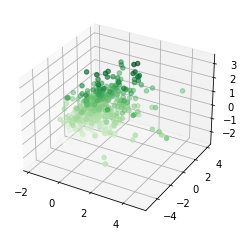

In [8]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = train["quantitative response of LC50"]
xdata = train["RDCHI"]
ydata = train["MLOGP"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [9]:
dataF = pd.DataFrame(train[["RDCHI", "MLOGP"]])
dataF

,RDCHI,MLOGP
400,-0.142168,-0.324660
146,-0.169295,-1.412617
326,-0.095312,-0.046212
61,-1.212446,0.473366
32,-1.513308,-0.165055
...,...,...
46,-0.461525,0.608858
257,-0.637850,0.238551
307,-0.356717,-0.585311
372,2.628472,-5.028997


In [10]:
targetF = pd.DataFrame(train["quantitative response of LC50"])
targetF

,quantitative response of LC50
400,0.079016
146,0.745597
326,0.532411
61,-0.473465
32,-0.649418
...,...
46,-0.682447
257,0.463351
307,-0.710071
372,-0.943074


In [11]:
sc=StandardScaler()
X_transform=sc.fit_transform(dataF)
lin_reg = LinearRegression()
lin_reg.fit(X_transform, targetF)
lin_reg.intercept_, lin_reg.coef_

(array([0.01488545]), array([[0.24041618, 0.43306015]]))

In [12]:
# Value order to be followed: x1,x2, x1^2,x1x2,x2^2, x1^3,x1^2x2,x1x2^2,x2^3.... meant for all degrees of gradient descent
valX = dataF[dataF.columns[:]].to_numpy()
valX1 = valX[:,0]**2 ##------------------------------------------------------------------------------------------------x1^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,0]*valX[:,1] #------------------------------------------------------------------------------------------x1x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**2 ##------------------------------------------------------------------------------------------------x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**3 ##------------------------------------------------------------------------------------------------x1^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]) ##----------------------------------------------------------------------------------x1^2x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**2) ##----------------------------------------------------------------------------------x1x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**3 #-------------------------------------------------------------------------------------------------x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**4 #-------------------------------------------------------------------------------------------------x1^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^3x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^2x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**3) #-----------------------------------------------------------------------------------x1x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**4 #-------------------------------------------------------------------------------------------------x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**5 #-------------------------------------------------------------------------------------------------x1^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^4x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^3x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^2x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**4) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**5 #-------------------------------------------------------------------------------------------------x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**6 #-------------------------------------------------------------------------------------------------x1^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^5x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^4x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^3x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^2x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**5) #-----------------------------------------------------------------------------------x1x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**6 #-------------------------------------------------------------------------------------------------x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**7 #-------------------------------------------------------------------------------------------------x1^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^6x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^5x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^4x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^3x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^2x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**6) #-----------------------------------------------------------------------------------x1x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**7 #-------------------------------------------------------------------------------------------------x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)


valX1 = valX[:,0]**8 #-------------------------------------------------------------------------------------------------x1^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^7x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^6x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^5x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^4x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^3x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^2x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**7) #-----------------------------------------------------------------------------------x1x2^7
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**8 #-------------------------------------------------------------------------------------------------x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX1 = valX[:,0]**9 #-------------------------------------------------------------------------------------------------x1^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**8)*(valX[:,1]) #-----------------------------------------------------------------------------------x1^8x2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**7)*(valX[:,1]**2) #--------------------------------------------------------------------------------x1^7x2^2
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**6)*(valX[:,1]**3) #--------------------------------------------------------------------------------x1^6x2^3
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**5)*(valX[:,1]**4) #--------------------------------------------------------------------------------x1^5x2^4
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**4)*(valX[:,1]**5) #--------------------------------------------------------------------------------x1^4x2^5
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**3)*(valX[:,1]**6) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0]**2)*(valX[:,1]**7) #--------------------------------------------------------------------------------x1^3x2^6
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = (valX[:,0])*(valX[:,1]**8) #-----------------------------------------------------------------------------------x1x2^8
valX = np.append(valX, np.column_stack([valX1]), axis = 1)
valX1 = valX[:,1]**9 #-------------------------------------------------------------------------------------------------x2^9
valX = np.append(valX, np.column_stack([valX1]), axis = 1)

valX = np.append(np.ones((436,1)), valX, axis=1)

valY = targetF[targetF.columns[:]].to_numpy()
print(np.shape(valY))
print(np.shape(valX))
# valX is the nd array of target values and their exponents, valY is the respective Yn for every x1n and x2n

print(valX[0,1])


(436, 1)
(436, 55)
-0.1421676648585421


In [13]:
iters = 1500
learningRate = 0.01 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)

w0 = 0.01488544255490112


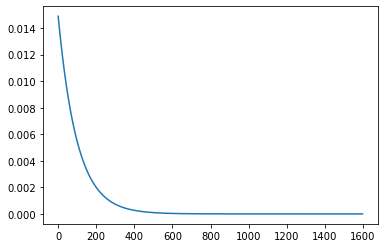

In [14]:
# Degree 0 manipulation for other degrees w = np.zeros((degree+1, 1))
w = 0
counter = 0
for i in range(iters):
    #print(np.mean(valY))
    w1 = w + learningRate*(np.mean(valY)-w)
    #print(w1,w)
    if w1-w <= 10**(-20):
        w=w1
        break
    counter+=1
    costArr[counter] += (np.mean(valY)-w)
    counterArr[counter] = counter
    w=w1
#print(counter)
print("w0 =", w)
fig,ax = plt.subplots()
ax.plot(costArr[1:])
plt.show() # from the graph below we can stop at 500 iterations itself, but we check for 10**(-20) difference anyway

w0=0.07901605040341349
w1=0.03237265762818684
w2=-0.009062363178817145


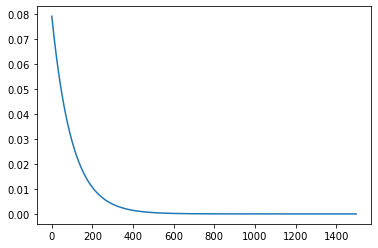

In [15]:
# Degree 1 here
degree = 1
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[:wSize,0]-(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

w0=0.07901605040341349
w1=0.03237265762818684
w2=-0.009062363178817145
w3=-0.08819738314935405
w4=-0.09141918485122831
w5=-0.11440820794549691


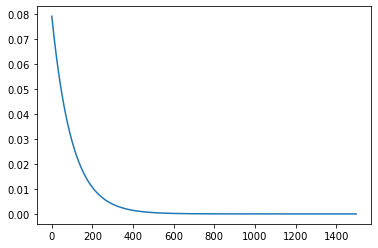

In [16]:
# Degree 2 here
degree = 2
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[:wSize,0]-(w*valX[j,:wSize]))*valX[j,:wSize])

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

In [21]:
print(costArr[iters])
print(type(w1), type(w), type(w2))

2.2639776900423847e-08
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


w0=0.07901607281679193
w1=0.0323726597957731
w2=-0.009062364911739597
w3=-0.08819738314935402
w4=-0.0914191848512283
w5=-0.11440820794549694
w6=0.008738761253657877
w7=0.002174306943591083
w8=-0.001625333864701379
w9=0.0045810174943909125


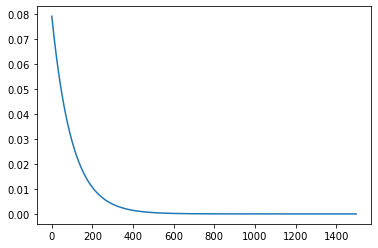

In [25]:
# Degree 3 here
degree = 3
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += ((valY[:wSize,0] - (w*valX[j,:wSize]))*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

w0=1185.2402033511448
w1=531.8364584488264
w2=-139.47270638618014
w3=-7778.326203266967
w4=-3237.5084820530624
w5=-8488.246765984715
w6=9802.584693092149
w7=576.8050913468845
w8=-603.6327875134696
w9=4649.466305776402
w10=-31027.339158747247
w11=-2606.8970978779903
w12=59954.25040410659
w13=-1239.6275422764775
w14=-139241.9646271056


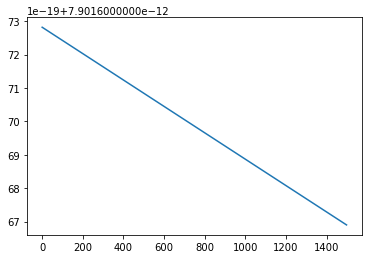

In [41]:
# Degree 4 here
learningRate = 0.5
degree = 4
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

w0=23.70482148947731
w1=10.636737731265839
w2=-2.7894562312547624
w3=-155.56719631521736
w4=-64.75028199727598
w5=-169.76555247225568
w6=196.06247029612618
w7=11.536251780407829
w8=-12.07287544786435
w9=92.99395083027633
w10=-621.1452716734849
w11=-52.14611056881933
w12=1199.2697211625775
w13=-24.800860083522252
w14=-2787.6508081072443
w15=7463.884440119376
w16=28.59700755017194
w17=-1482.1060232774478
w18=-9.933943149087863
w19=-2120.4948774217687
w20=1046.4754495295667


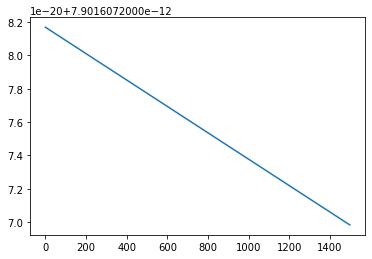

In [43]:
learningRate = 0.01
degree = 5
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

w0=23.70482148947731
w1=10.636737731265839
w2=-2.7894562312547624
w3=-155.56719631521736
w4=-64.75028199727598
w5=-169.76555247225568
w6=196.06247029612618
w7=11.536251780407829
w8=-12.07287544786435
w9=92.99395083027633
w10=-621.1452716734849
w11=-52.14611056881933
w12=1199.2697211625775
w13=-24.800860083522252
w14=-2787.6508081072443
w15=7463.884440119376
w16=28.59700755017194
w17=-1482.1060232774478
w18=-9.933943149087863
w19=-2120.4948774217687
w20=1046.4754495295667
w21=2573.6501820289154
w22=-5250.189366892655
w23=6502.226446742771
w24=197.2574133537969
w25=-3740.092725024406
w26=-4383.138613421028
w27=-22844.158694961683


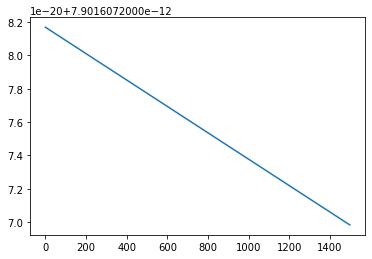

In [44]:
learningRate = 0.01
degree = 6
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

w0=23.70482148947731
w1=10.636737731265839
w2=-2.7894562312547624
w3=-155.56719631521736
w4=-64.75028199727598
w5=-169.76555247225568
w6=196.06247029612618
w7=11.536251780407829
w8=-12.07287544786435
w9=92.99395083027633
w10=-621.1452716734849
w11=-52.14611056881933
w12=1199.2697211625775
w13=-24.800860083522252
w14=-2787.6508081072443
w15=7463.884440119376
w16=28.59700755017194
w17=-1482.1060232774478
w18=-9.933943149087863
w19=-2120.4948774217687
w20=1046.4754495295667
w21=2573.6501820289154
w22=-5250.189366892655
w23=6502.226446742771
w24=197.2574133537969
w25=-3740.092725024406
w26=-4383.138613421028
w27=-22844.158694961683
w28=206268.47953570433
w29=4440.4049022625895
w30=-7638.916730738984
w31=-1944.808224656557
w32=-23719.09499230313
w33=10775.44944924557
w34=6623.876600887267
w35=1456.517186280017


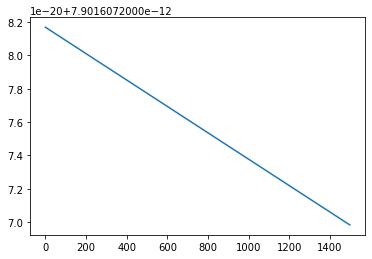

In [45]:
learningRate = 0.01
degree = 7
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

w0=23.70482148947731
w1=10.636737731265839
w2=-2.7894562312547624
w3=-155.56719631521736
w4=-64.75028199727598
w5=-169.76555247225568
w6=196.06247029612618
w7=11.536251780407829
w8=-12.07287544786435
w9=92.99395083027633
w10=-621.1452716734849
w11=-52.14611056881933
w12=1199.2697211625775
w13=-24.800860083522252
w14=-2787.6508081072443
w15=7463.884440119376
w16=28.59700755017194
w17=-1482.1060232774478
w18=-9.933943149087863
w19=-2120.4948774217687
w20=1046.4754495295667
w21=2573.6501820289154
w22=-5250.189366892655
w23=6502.226446742771
w24=197.2574133537969
w25=-3740.092725024406
w26=-4383.138613421028
w27=-22844.158694961683
w28=206268.47953570433
w29=4440.4049022625895
w30=-7638.916730738984
w31=-1944.808224656557
w32=-23719.09499230313
w33=10775.44944924557
w34=6623.876600887267
w35=1456.517186280017
w36=-56228.78493119486
w37=-1886.297704068855
w38=49249.6222079493
w39=30592.147896938455
w40=-14781.071286656083
w41=782.3952571032523
w42=-82129.8265362767
w43=-34036.834944668095
w

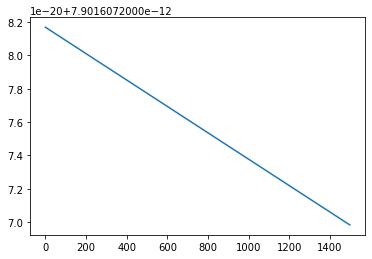

In [46]:
learningRate = 0.01
degree = 8
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 

w0=23.70482148947731
w1=10.636737731265839
w2=-2.7894562312547624
w3=-155.56719631521736
w4=-64.75028199727598
w5=-169.76555247225568
w6=196.06247029612618
w7=11.536251780407829
w8=-12.07287544786435
w9=92.99395083027633
w10=-621.1452716734849
w11=-52.14611056881933
w12=1199.2697211625775
w13=-24.800860083522252
w14=-2787.6508081072443
w15=7463.884440119376
w16=28.59700755017194
w17=-1482.1060232774478
w18=-9.933943149087863
w19=-2120.4948774217687
w20=1046.4754495295667
w21=2573.6501820289154
w22=-5250.189366892655
w23=6502.226446742771
w24=197.2574133537969
w25=-3740.092725024406
w26=-4383.138613421028
w27=-22844.158694961683
w28=206268.47953570433
w29=4440.4049022625895
w30=-7638.916730738984
w31=-1944.808224656557
w32=-23719.09499230313
w33=10775.44944924557
w34=6623.876600887267
w35=1456.517186280017
w36=-56228.78493119486
w37=-1886.297704068855
w38=49249.6222079493
w39=30592.147896938455
w40=-14781.071286656083
w41=782.3952571032523
w42=-82129.8265362767
w43=-34036.834944668095
w

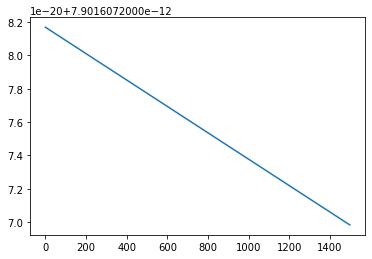

In [47]:
learningRate = 0.01
degree = 9
wSize = int((degree+1)*(degree+2)/2)
w = np.zeros(wSize) # similar template for others
w1 = np.zeros(wSize)
#print(w, '\n', w1)

counter = 0
costArr= np.zeros(iters*20 +50)
counterArr = np.zeros(iters*20 +50)
for i in range(iters*20):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[:wSize,0] - (w*valX[j,:wSize]))/10**10)*valX[j,:wSize])/np.shape(valX)[0]
    
    w1 = w + learningRate*w2
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i]*10**10, sep = '')

np.shape(valX)[0]
fig,ax = plt.subplots()
ax.plot(costArr[1:iters])
plt.show() # the number of iterations are maxed out in the end, 